In [1]:
%matplotlib inline
# Necassary Imports
from qiskit import *
from numpy.random import randint as int_random
import numpy as nump
from qiskit.compiler import transpile, assemble
from qiskit.visualization import *


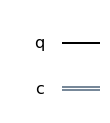

In [2]:
quantumCir = QuantumCircuit(1, 1)
quantumCir.draw(output='mpl')
# Defining a quantum circuit.

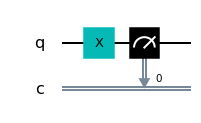

In [3]:
quantumCir.x(0)
quantumCir.measure(0, 0)
quantumCir.draw(output='mpl')
# using x-gate to flip the bit or rotate by pi radian.
# Measuring the quantum bit.

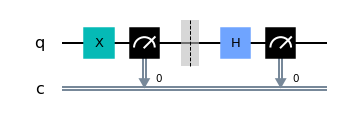

In [4]:
quantumCir.barrier()
quantumCir.h(0)
quantumCir.measure(0,0)
quantumCir.draw(output='mpl')
# using Hadamard gate to change the basis or rotate by pi radian and measuring

┌───┐┌─┐ ░ ┌───┐┌─┐
q_0: ┤ X ├┤M├─░─┤ H ├┤M├
     └───┘└╥┘ ░ └───┘└╥┘
c: 1/══════╩══════════╩═
           0          0

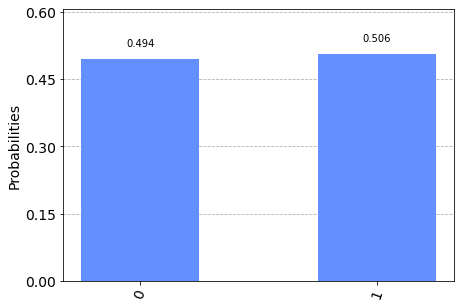

In [5]:
# Graphical view of the circuit
display(quantumCir.draw())
backend = Aer.get_backend('qasm_simulator')
work = execute(quantumCir, backend)
qiskit.visualization.plot_histogram(work.result().get_counts())

In [6]:
def encrypt_M(q_bits, bases_set):
#         Creating an encoding function
#         @q_bits - original_msg in q_bits
#         @bases_set - Quantum gates
#         returns original_msg
    original_msg = []
    for i in range(100):
        quantumCir = QuantumCircuit(1,1)
        if bases_set[i] == 0: # Prepare qubit in Z-basis
            if q_bits[i] == 0:
                pass 
            else:
                quantumCir.x(0)
        else: # Prepare qubit in X-basis
            if q_bits[i] == 0:
                quantumCir.h(0)
            else:
                quantumCir.x(0)
                quantumCir.h(0)
        quantumCir.barrier()
        original_msg.append(quantumCir)
    return original_msg

nump.random.seed(seed=0) # To generate randomness
n = 100 # Number of q_bits in original_msg
Tanmay_base = int_random(2, size=n) # Tanmay chooses random basis for each bit
Tanmay_bit = int_random(2, size=n) # original_msg q_bits (original q_bits)
print("Tanmay q_bits = " + str(Tanmay_bit))
original_msg = encrypt_M(Tanmay_bit, Tanmay_base) # Encodes the q_bits according to the basis
print("original_msg has been encoded")

Tanmay q_bits = [1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
original_msg has been encoded


In [7]:
def measure_original_msg(original_msg, bases_set):
#         Measuring the computation from the 
#         @original_msg - original_msg q_bits
#         @bases_set - quantum gates
#         returns qbit_measurement
    backend = Aer.get_backend('qasm_simulator') # Backend simulator
    qbit_measurement = []
    for q in range(n):
        if bases_set[q] == 0: # measuring in Z-basis
            original_msg[q].measure(0,0)
        if bases_set[q] == 1: # measuring in X-basis
            original_msg[q].h(0)
            original_msg[q].measure(0,0)
        result = execute(original_msg[q], backend, shots=1, memory=True).result()
        # execute the quantum circuit on a IBM quantum computer
        measured_bit = int(result.get_memory()[0])
        qbit_measurement.append(measured_bit)
    return qbit_measurement

#If there is no eavesdropping and Divang measures the q_bits
Divang_base = int_random(2, size=n) # Divang chooses random basis for each bit
Divang_result = measure_original_msg(original_msg, Divang_base) # Divang measures the q_bits according to his basis
print("Divang's bit measurement = " + str(Divang_result))

Divang's bit measurement = [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [8]:
def discard_q_bits(Tanmay_bases_set, Divang_bases_set, q_bits):
#         Discards the uncommon bases_set
#         @Tanmay_bases_set - Tanmay's base
#         @Divang_bases_set - Divang's base
#         @q_bits - original_msg
#         returns good_q_bits
    good_q_bits = []
    for q in range(n):
        if Tanmay_bases_set[q] == Divang_bases_set[q]:
            # If  the basis of Tanmay & Divang matches, add
            # this to 'good' q_bits
            good_q_bits.append(q_bits[q])
    return good_q_bits

#Now we discard the q_bits which have different basis with respect to Tanmay & Divang
# and store them as their keys respectively
Tanmay_key = discard_q_bits(Tanmay_base, Divang_base, Tanmay_bit)
Divang_key = discard_q_bits(Tanmay_base, Divang_base, Divang_result)
print("Tanmay's key = " + str(Tanmay_key))
print("Divang's key = " + str(Divang_key))

Tanmay's key = [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
Divang's key = [0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]


In [9]:
def q_bits_selection(q_bits, selection):
#         Measures the random sam q_bits
#         @q_bits - original_msg
#         @selection - good_q_bits
#         returns sam
    sam = []
    for idx in selection:
        # taking modulus
        idx = nump.mod(idx, len(q_bits))
        sam.append(q_bits.pop(idx))
    return sam

#Now we take random indices of a fixed sam size to compare their respective keys
sam = 10
selected_bits = int_random(n, size=sam) #random indices
print("Randomly chosen q_bits = " + str(selected_bits))
Tanmay_sam = q_bits_selection(Tanmay_key, selected_bits)
Divang_sam = q_bits_selection(Divang_key, selected_bits)
print("Tanmay's sample = " + str(Tanmay_sam))
print("Divang's sample = " + str(Divang_sam))
if Divang_sam == Tanmay_sam:
    print("sample matched, no eavesdropping !")
else:
    print("sample does not Matched")

Randomly chosen q_bits = [28  2 27 83 89 23 53 51 46 20]
Tanmay's sample = [0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
Divang's sample = [0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
sample matched, no eavesdropping !


In [10]:
#If an Eavesdropper measures the q_bits before Divang measures them
# Assuming that no external noise is there (error)
nump.random.seed(seed=0)

## Stage I
Tanmay_bit = int_random(2, size=n)

## Stage II
Tanmay_base = int_random(2, size=n)
original_msg = encrypt_M(Tanmay_bit, Tanmay_base)

## Nikhil trying to intercept !!
Nikhil_base = int_random(2, size=n)
intercepted_original_msg = measure_original_msg(original_msg, Nikhil_base)

## Stage III
Divang_base = int_random(2, size=n)
Divang_result = measure_original_msg(original_msg, Divang_base)

## Stage IV
Tanmay_key = discard_q_bits(Tanmay_base, Divang_base, Tanmay_bit)
Divang_key = discard_q_bits(Tanmay_base, Divang_base, Divang_result)

## Step V
sam = 15
selected_bits = int_random(n, size=sam)
print("Randomly chosen q_bits = " + str(selected_bits))
Tanmay_sam = q_bits_selection(Tanmay_key, selected_bits)
Divang_sam = q_bits_selection(Divang_key, selected_bits)
print("Tanmay's sample = " + str(Tanmay_sam))
print("Divang's sample = " + str(Divang_sam))
if Divang_sam == Tanmay_sam:
    print("Sample matched, no eavesdropping !")
else:
    print("Sample does not matched, there is an eavesdropping !")

Randomly chosen q_bits = [70 71 18 92 43 83 49 41 93 46 21 73 89 96 91]
Tanmay's sample = [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1]
Divang's sample = [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1]
Sample does not matched, there is an eavesdropping !


# Risk Ananlysis
Lower the no of bits lower is the chance of getting caught while intercepting and Vice versa.

{1: 0, 2: 2, 3: 2, 4: 2, 5: 4, 6: 3, 7: 3, 8: 5, 9: 4, 10: 7, 11: 6, 12: 9, 13: 8, 14: 5, 15: 12, 16: 9, 17: 8, 18: 11, 19: 12, 20: 9, 21: 8, 22: 9, 23: 11, 24: 13, 25: 13, 26: 15, 27: 15, 28: 12, 29: 12, 30: 16, 31: 15, 32: 16, 33: 18, 34: 16, 35: 17, 36: 17, 37: 18, 38: 19, 39: 20, 40: 18, 41: 21, 42: 21, 43: 22, 44: 21, 45: 23, 46: 23, 47: 24}


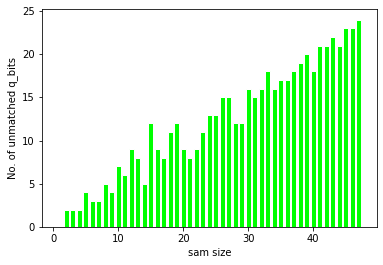

In [14]:
import matplotlib.pyplot as plot_graph
nump.random.seed(seed=0)

Tanmay_q_bits = int_random(2, size=n)
Tanmay_bases_set = int_random(2, size=n)

original_msg = encrypt_M(Tanmay_q_bits, Tanmay_bases_set)

Nikhil_bases_set = int_random(2, size=n)
intercepted_original_msg = measure_original_msg(original_msg, Nikhil_bases_set)

Divang_bases_set = int_random(2, size=n)
Divang_results = measure_original_msg(original_msg, Divang_bases_set)

Divang_key = discard_q_bits(Tanmay_bases_set, Divang_bases_set, Divang_results)
Tanmay_key = discard_q_bits(Tanmay_bases_set, Divang_bases_set, Tanmay_q_bits)

sam = len(Tanmay_key)
l1 = []
l2 = []
s = 1
while s <= sam:
    a = Tanmay_key.copy()
    b = Divang_key.copy()
    sam_size = s
    selected_bitSection = int_random(n, size=sam_size)
    Divang_sam = q_bits_selection(b, selected_bitSection)
    Tanmay_sam = q_bits_selection(a, selected_bitSection)
    j = 0
    c = 0
    while j < sam_size:
        if Divang_sam[j] != Tanmay_sam[j] :
            c = c + 1
        j = j + 1
    l1.append(s)
    l2.append(c)
    s = s+1
d = {l1[i] : l2[i] for i in range(len(l1))}
print(d)
plot_graph.bar(l1, l2, facecolor='lime', edgecolor='white')
plot_graph.xlabel('sam size')
plot_graph.ylabel('No. of unmatched q_bits')
plot_graph.show()